In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

%matplotlib inline

from subprocess import check_output


In [7]:
#check_output('ls')
#print(check_output(["ls", "../input"]).decode("utf8"))

In [22]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users =  pd.read_csv('G:/material/Python/Project/ml-1m/ml-1m/users.dat',sep='::', encoding='latin-1',
                 names=['UserID','Gender','Age','Occupation','Zip-code'])

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('G:/material/Python/Project/ml-1m/ml-1m/ratings.dat',sep='::', encoding='latin-1',
                 names=['UserID','MovieID','Rating','Timestamp'])

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies =pd.read_csv('G:/material/Python/Project/ml-1m/ml-1m/movies.dat',sep='::', encoding='latin-1',
                 names=['MovieID','Title','Genre'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added b

In [23]:
def occupation_code(occ):
    if occ == 0: 
        return "other"
    elif occ == 1:
        return 'educator'
    elif occ == 2:
        return 'artist'
    elif occ == 3:
        return 'clerical'
    elif occ == 4:
        return 'grad student'
    elif occ == 5:
        return 'customer service'
    elif occ == 6:
        return 'doctor'
    elif occ == 7:
        return 'executive'
    elif occ == 8:
        return 'farmer'
    elif occ == 9:
        return 'homemaker'
    elif occ == 10:
        return 'K-12 student'
    elif occ == 11:
        return 'lawyer'
    elif occ == 12:
        return 'programmer'
    elif occ == 13:
        return 'retired'
    elif occ == 14:
        return 'sales'
    elif occ == 15:
        return 'scientist'
    elif occ == 16:
        return 'self-employed'
    elif occ == 17:
        return 'engineer'
    elif occ == 18:
        return 'tradesman'
    elif occ == 19:
        return 'unemployed'
    elif occ == 20:
        return 'writer'
    
users['Occupation'] = users['Occupation'].apply(occupation_code)


In [24]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,K-12 student,48067
1,2,M,56,self-employed,70072
2,3,M,25,scientist,55117
3,4,M,45,executive,02460
4,5,M,25,writer,55455


In [27]:
movie_ratings = pd.merge(movies, ratings)
df = pd.merge(movie_ratings, users)

df.head(2)

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,K-12 student,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,K-12 student,48067


# Data Preprocessing

In [28]:
df.drop(df.columns[[2,5]], axis=1, inplace=True)
#ratings.drop( "unix_timestamp", inplace = True, axis = 1 ) 
#movies.drop(movies.columns[[3,4]], inplace = True, axis = 1 )
#Dropping all the columns that are not really needed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
MovieID       1000209 non-null int64
Title         1000209 non-null object
UserID        1000209 non-null int64
Rating        1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null object
Zip-code      1000209 non-null object
dtypes: int64(4), object(4)
memory usage: 68.7+ MB


In [29]:
# Movie Ratings

In [30]:
movie_stats = df.groupby('Title').agg({'Rating': [np.size, np.mean]})
movie_stats.head()

Rating          
                                size      mean
Title                                         
$1,000,000 Duck (1971)            37  3.027027
'Night Mother (1986)              70  3.371429
'Til There Was You (1997)         52  2.692308
'burbs, The (1989)               303  2.910891
...And Justice for All (1979)    199  3.713568

In [31]:
# setting athreshhold for at least 50 ratings for better analysis

In [32]:
min_50 = movie_stats['Rating']['size'] >= 50
movie_stats[min_50].sort_values([('Rating', 'mean')], ascending=False).head()

Rating          
                                                     size      mean
Title                                                              
Sanjuro (1962)                                         69  4.608696
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548

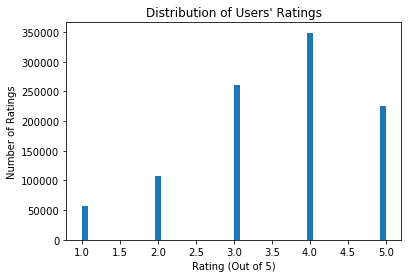

In [33]:
ratings.Rating.plot.hist(bins=50)
plt.title("Distribution of Users' Ratings")
plt.ylabel('Number of Ratings')
plt.xlabel('Rating (Out of 5)');

In [34]:
# Raters' Age Distribution

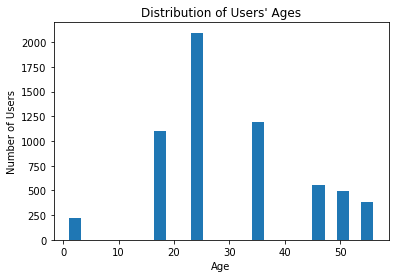

In [36]:
users.Age.plot.hist(bins=25)
plt.title("Distribution of Users' Ages")
plt.ylabel('Number of Users')
plt.xlabel('Age');

In [37]:
# Pivot Table

In [38]:
ratings_matrix = ratings.pivot_table(index=['MovieID'],columns=['UserID'],values='Rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True )
ratings_matrix.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,...,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Cosine similarity

In [40]:
movie_similarity = 1 - pairwise_distances( ratings_matrix.as_matrix(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix = pd.DataFrame( movie_similarity )
ratings_matrix.head(5)

,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,0.000000,0.390349,0.267943,0.178789,0.256569,0.347373,0.301490,0.125709,0.106620,0.377459,...,0.099502,0.020966,0.084105,0.081826,0.045949,0.309676,0.186633,0.093479,0.042829,0.182691
1,0.390349,0.000000,0.240946,0.155457,0.249970,0.244827,0.262772,0.196521,0.158469,0.386200,...,0.061819,0.015209,0.075310,0.095573,0.074271,0.213650,0.140781,0.087013,0.026063,0.122185
2,0.267943,0.240946,0.000000,0.192788,0.308290,0.187020,0.292230,0.092122,0.128378,0.245601,...,0.038492,0.065507,0.049512,0.087377,0.050985,0.190575,0.104837,0.062258,0.010073,0.097786
3,0.178789,0.155457,0.192788,0.000000,0.271990,0.125170,0.220024,0.049554,0.060334,0.133707,...,0.055486,0.053300,0.002227,0.025278,0.025204,0.118902,0.096318,0.022588,0.024769,0.095154
4,0.256569,0.249970,0.308290,0.271990,0.000000,0.148114,0.305107,0.095512,0.138392,0.237681,...,0.026632,0.083898,0.046399,0.047542,0.016156,0.174554,0.092403,0.051633,0.010750,0.112835


In [41]:
# Recommender ENgine

In [49]:
try:
    #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
    user_inp='Toy Story (1995)'
    inp=movies[movies['Title']==user_inp].index.tolist()
    inp=inp[0]
    
    movies['similarity'] = ratings_matrix.iloc[inp]
    movies.columns = ['MovieID', 'Title','similarity']
    movies.head(2)    
except:
    print("Sorry, the movie is not in the database!")

Sorry, the movie is not in the database!


In [48]:
print("Recommended movies based on your choice of ",user_inp ,": \n",
      movies.sort_values( ["similarity"], ascending = False )[1:10])

Recommended movies based on your choice of  Toy Story (1995) : 
       MovieID                                              Title  \
1173     1190                     Tie Me Up! Tie Me Down! (1990)   
574       578                        Hour of the Pig, The (1993)   
2162     2231                                    Rounders (1998)   
1178     1196  Star Wars: Episode V - The Empire Strikes Back...   
33         34                                        Babe (1995)   
1106     1122                            Plutonium Circus (1995)   
1449     1477                                  Love Jones (1997)   
346       350                                 Client, The (1994)   
2374     2443                            Playing by Heart (1998)   

                                  Genre  similarity  
1173                              Drama    0.610826  
574                       Drama|Mystery    0.605849  
2162                        Crime|Drama    0.579382  
1178  Action|Adventure|Drama|Sci-Fi|Wa